In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pdp
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [63]:
# LOAD DATA
INPUT_DIR  = '../../../input/m5-forecasting-accuracy/'
LOG_NAME = '06_16_23_15_55'
data = pd.read_csv(INPUT_DIR + "sales_train_evaluation.csv")
predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))

In [64]:
predicted.shape

(1, 9, 28)

In [65]:
predicted

array([[[0.38830602, 0.3151759 , 0.29311544, 0.34237203, 0.63075256,
         0.8226192 , 0.8903078 , 0.5144673 , 0.49138892, 0.48891714,
         0.43807167, 0.58161324, 0.9282885 , 0.8706087 , 0.5251623 ,
         0.45324373, 0.36096162, 0.41069138, 0.5457431 , 0.7237824 ,
         0.8025114 , 0.424096  , 0.40942693, 0.35972238, 0.34798434,
         0.48955947, 0.7124224 , 0.75120294],
        [0.39138085, 0.3291791 , 0.29006785, 0.34205964, 0.6345015 ,
         0.79854655, 0.9048223 , 0.5031204 , 0.471923  , 0.45535907,
         0.43973768, 0.5725917 , 0.9073931 , 0.856308  , 0.5763999 ,
         0.44023156, 0.34742397, 0.43373108, 0.54922354, 0.7082328 ,
         0.7954208 , 0.42964542, 0.41551083, 0.3830486 , 0.33961338,
         0.5015117 , 0.72418684, 0.7263716 ],
        [0.357532  , 0.32178307, 0.27886134, 0.3585332 , 0.61599904,
         0.80426013, 0.9091878 , 0.49310347, 0.4754878 , 0.47004396,
         0.43986225, 0.5634477 , 0.9217604 , 0.8454114 , 0.5693376 ,
         0.

In [66]:
# InverseするためのScalerを作る
data = data.drop('d_1792',axis=1)
use_days = json_load['use_days']
train_x = np.array(data.iloc[:, -1 * (28*2 + use_days) : -28*2]).sum(axis=0).reshape(1,-1)
# train_x = np.array(data.iloc[:, -1 * (28*1 + use_days) : -28*1]).sum(axis=0).reshape(1,-1)
mm = MinMaxScaler(feature_range=(0.05, 0.95))
mm.fit(train_x.T)

MinMaxScaler(copy=True, feature_range=(0.05, 0.95))

In [67]:
# 予測値をInverse Transform
for i in range(9):
    predicted[:,i] = mm.inverse_transform(predicted[:,i])

In [48]:
days = 100
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
sells.reshape(1,-1).shape

(1, 72)

In [69]:
pred_array = np.zeros([1,9,100])

In [75]:
pred_array[0,2]

array([53715.        , 48337.        , 46152.        , 37702.        ,
       36545.        , 36436.        , 40392.        , 50857.        ,
       52081.        , 37328.        , 33981.        , 34068.        ,
       34615.        , 37649.        , 47887.        , 50915.        ,
       37259.        , 36536.        , 38458.        , 41459.        ,
       39325.        , 52322.        , 57218.        , 40562.        ,
       37727.        , 37032.        , 38267.        , 40887.        ,
       52711.        , 51421.        , 42035.        , 40117.        ,
       36606.        , 35009.        , 39652.        , 46181.        ,
       47825.        , 37360.        , 35475.        , 34786.        ,
       34003.        , 45611.        , 53863.        , 46360.        ,
       36041.        , 33857.        , 32359.        , 34681.        ,
       45536.        , 52672.        , 56425.        , 40418.        ,
       39683.        , 39134.        , 38116.        , 43220.        ,
      

In [76]:
for i in range(9):
    pred_array[0,i] = np.concatenate([sells.reshape(1,-1),predicted[:,i]],axis=1)
    print(pred_array)
#     predicted[:,i] = np.concatenate([sells.reshape(1,-1),predicted[:,i]],axis=1)

[[[53715.         48337.         46152.         37702.
   36545.         36436.         40392.         50857.
   52081.         37328.         33981.         34068.
   34615.         37649.         47887.         50915.
   37259.         36536.         38458.         41459.
   39325.         52322.         57218.         40562.
   37727.         37032.         38267.         40887.
   52711.         51421.         42035.         40117.
   36606.         35009.         39652.         46181.
   47825.         37360.         35475.         34786.
   34003.         45611.         53863.         46360.
   36041.         33857.         32359.         34681.
   45536.         52672.         56425.         40418.
   39683.         39134.         38116.         43220.
   56340.         53856.         42427.         39069.
   35193.         37529.         41789.         48362.
   51640.         38059.         37570.         35343.
   35033.         40517.         48962.         49795.
   36256.2

In [55]:
pred_array[0][0].shape

(100,)

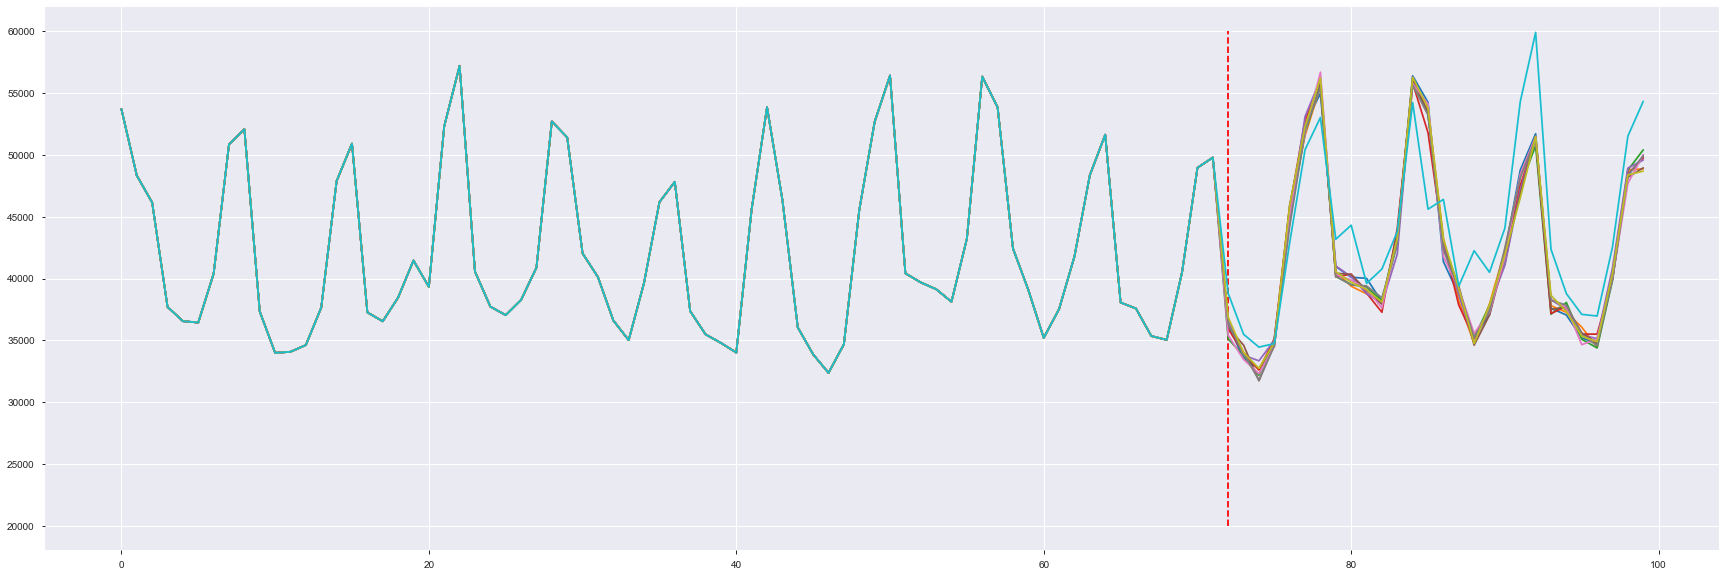

In [77]:
days = 100
f, ax = plt.subplots(figsize=(30, 10))
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
for i in range(9):
    plt.plot(pred_array[0][i])
plt.plot(np.array(data.iloc[:, -1 * days :]).sum(axis=0))
# sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
plt.vlines(days-28, 20000, 60000, "red", linestyles='dashed')